# Task 3 = IRIS Flower Classification

### # Problem Statement 
- The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

- Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks. 

### # Importing Library

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### # Importing dataset

In [36]:
data = pd.read_csv('IRIS.csv')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.shape

(150, 5)

### # EDA 

C:\Users\DELL\AppData\Local\Temp\ipykernel_21852\398681681.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((data.sepal_width) , bins = 20)  # nd means good
C:\Users\DELL\AppData\Local\Temp\ipykernel_21852\398681681.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((data.sepal_length) , bin

<Axes: xlabel='petal_width', ylabel='Density'>

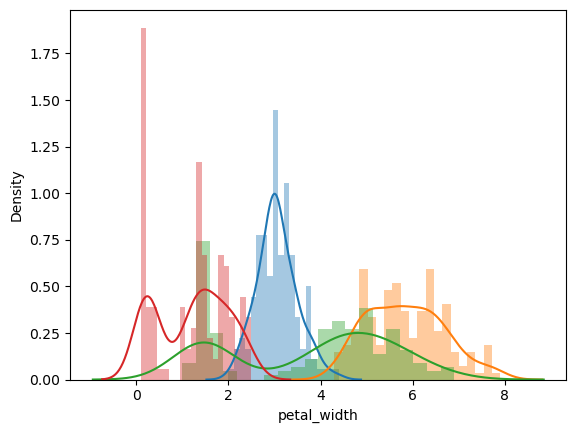

In [50]:
sns.distplot((data.sepal_width) , bins = 20)  # nd means good
plt.subplot(1,1,1)
sns.distplot((data.sepal_length) , bins = 20)  # nd means good
plt.subplot(1,1,1)
sns.distplot((data.petal_length) , bins = 20)  # nd means good
plt.subplot(1,1,1)
sns.distplot((data.petal_width) , bins = 20)  # nd means good
plt.subplot(1,1,1)


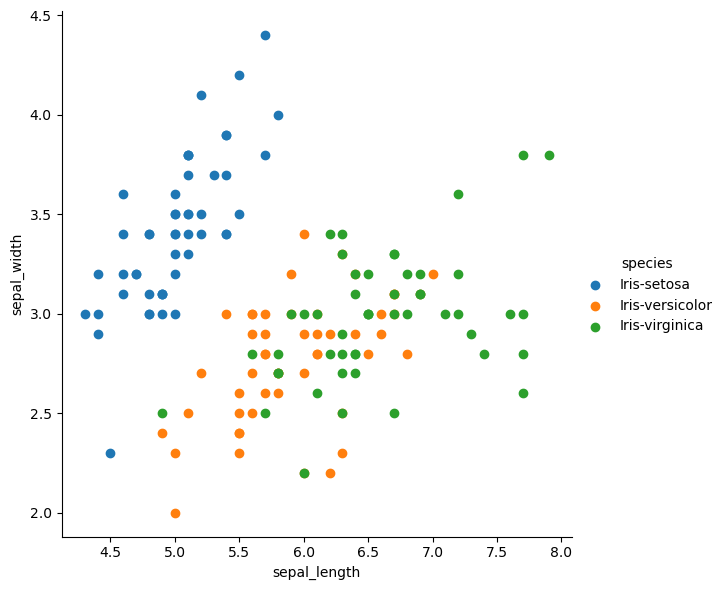

In [4]:
sns.FacetGrid(data , hue = 'species',height=6 ).map(plt.scatter,'sepal_length' , 'sepal_width' ).add_legend()

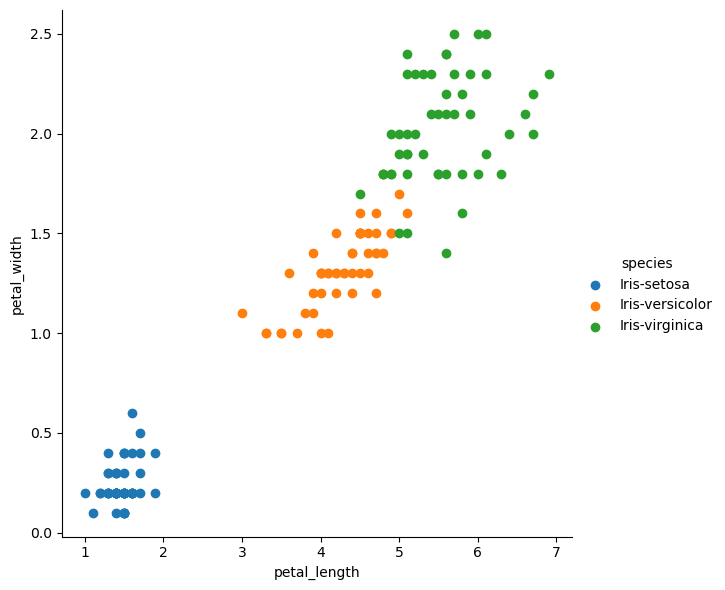

In [5]:
sns.FacetGrid(data , hue = 'species' , height=6).map(plt.scatter , 'petal_length' , 'petal_width').add_legend()

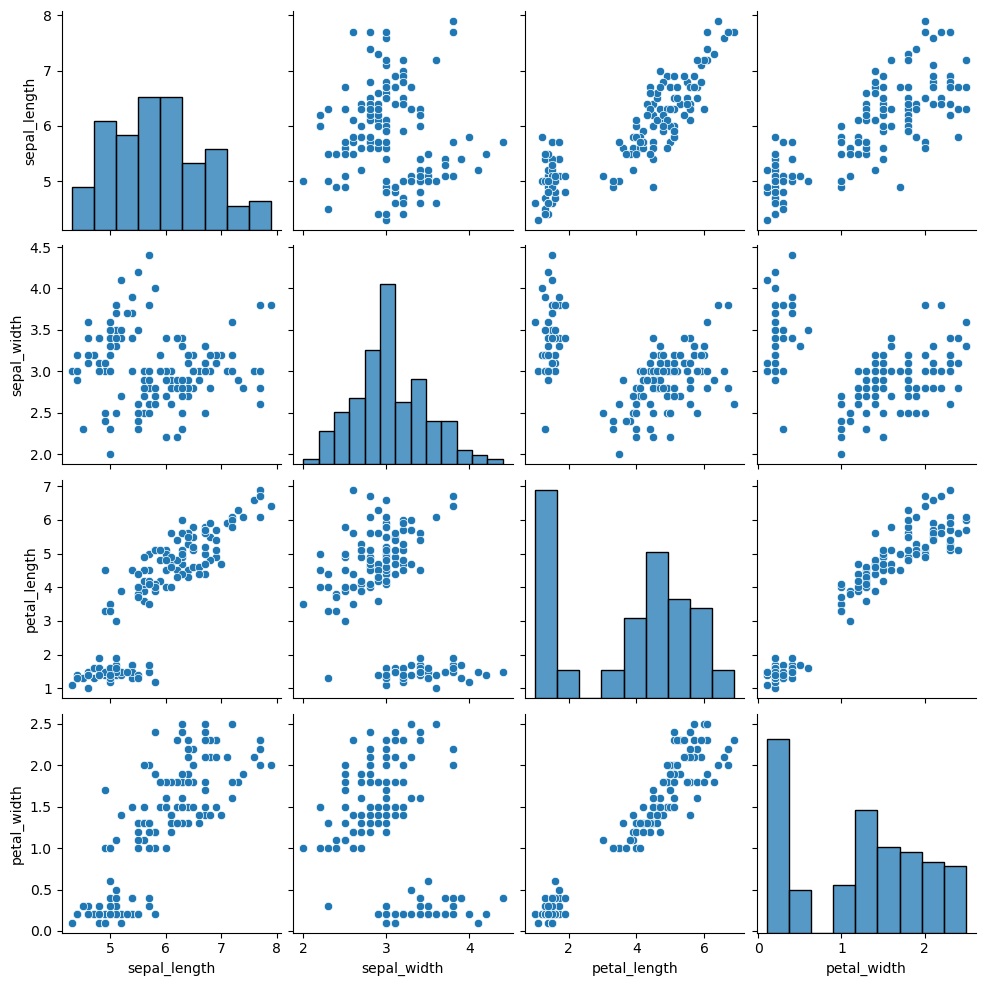

In [6]:
sns.pairplot(data)

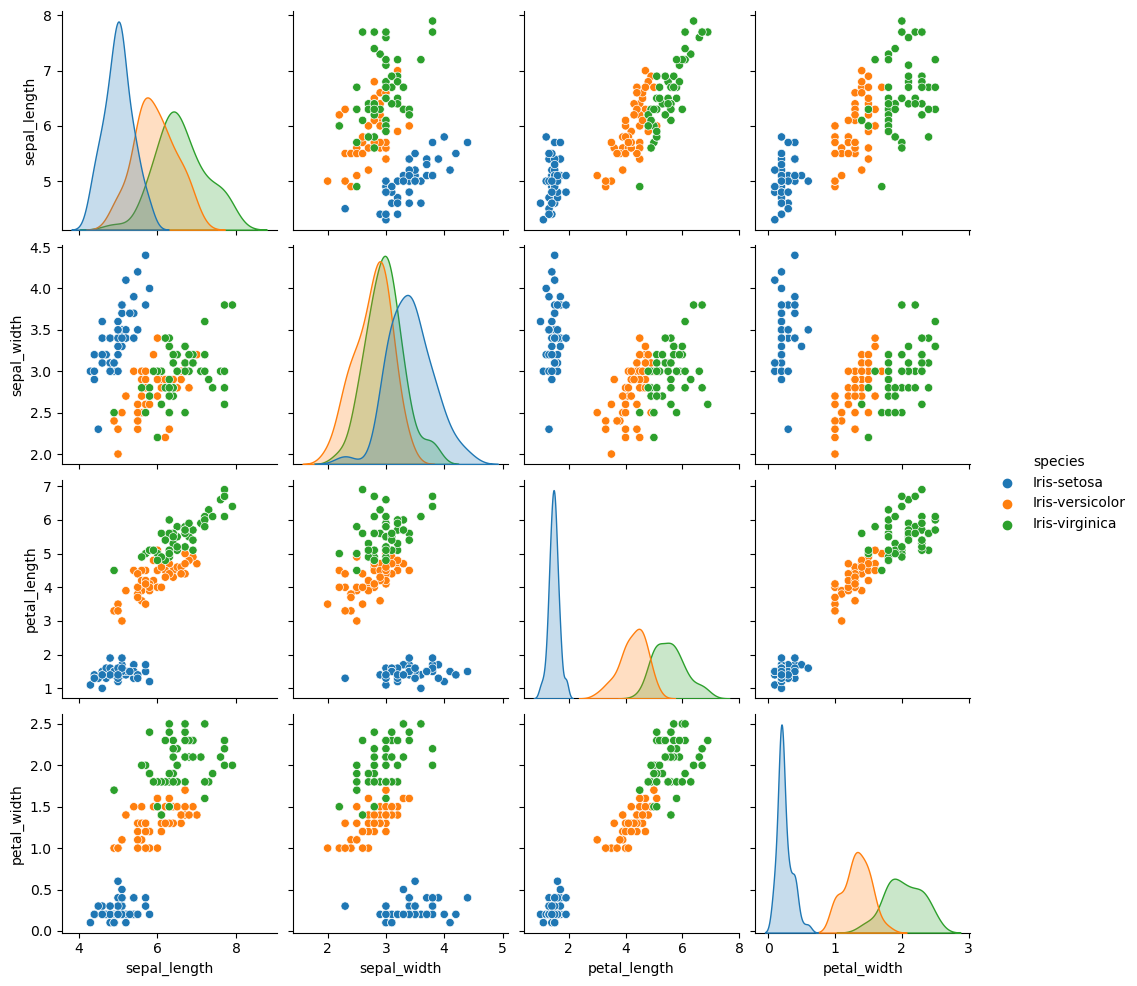

In [7]:
sns.pairplot(data , hue = 'species')

## Data Preprocessing 
### # Checking data type [info]

In [13]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### # Checking null values

In [14]:
data.isna().sum()   # no null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### # Stastical summary

In [10]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### # Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
data['species'] = le.fit_transform(data['species'])
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### # Extract features and target 

In [54]:
x = data.iloc[:,:4]   # Faetures 
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [55]:
y = data.iloc[:,4]   # Target
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

### # Correlation

In [56]:
data.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

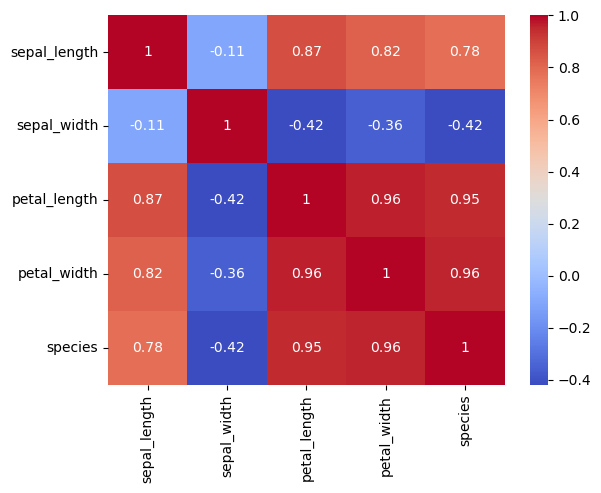

In [57]:
sns.heatmap(data.corr() , annot = True , cmap ='coolwarm')

### # Split data into Train and Test

In [58]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [84]:
from imblearn.over_sampling import SMOTE 

smote = SMOTE(random_state = 30)
x_balanced, y_balanced = smote.fit_resample(x, y )

In [85]:
data.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [96]:
x_train,x_test,y_train,y_test = train_test_split(x , y, train_size=0.7 , random_state = 5)

### # Model Training Using KNN Classifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier

In [98]:
knn = KNeighborsClassifier(n_neighbors = 3)

In [99]:
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=3)

### # Evaluate model

In [106]:
y_pred_test = knn.predict(x_test) #predicted value
y_pred_train = knn.predict(x_train)

In [101]:
np.array(y_test)   # actual value 

array([1, 2, 2, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1])

In [107]:
y_pred_test    #predicted value

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0,
       1])

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,y_pred_test))

[[15  0  0]
 [ 0 14  2]
 [ 0  0 14]]


### # Check accuracy

In [109]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred_test)   # test accuracy

0.9555555555555556

In [111]:
accuracy_score(y_train , y_pred_train)   # traing accuracy

0.9714285714285714

In [112]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.88      0.93        16
           2       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



### # Conclusion
- Model is perfroming good with KNN ALgorithm with acciracy of 95 %

### Model testing

In [115]:
data = {'sepal_length' :[6.7] , 'sepal_width' : [3.0] , 'petal_length' : [5.2] , 'petal_width' :[2.0]}
df = pd.DataFrame(data)
df

,sepal_length,sepal_width,petal_length,petal_width
0,6.7,3.0,5.2,2.0


In [117]:
pred_species = knn.predict(df)
print('predicted species is = ' , pred_species)

predicted species is =  [2]
